# 📝 SHL Grammar Scoring Engine – Final Report

## 🌟 Objective
The goal of this project is to develop a **Grammar Scoring Engine** that predicts a grammar score (0–5) from spoken audio samples. These predictions help assess spoken grammar fluency and accuracy, as per SHL's provided scoring rubric.

The final system includes:
- Audio transcription using **AssemblyAI API**
- Text vectorization via TF-IDF
- Regression modeling using **Ridge** regression
- Evaluation using RMSE

---

## 🌐 Live Demo
You can try the hosted Streamlit app here:

🔗https://grammar-scoring-engine-72.streamlit.app/

---

## 📦 Dataset Overview

| File | Description |
|------|-------------|
| `train.csv` | Contains audio `filename`s and true `label`s (grammar scores). |
| `test.csv` | Contains `filename`s for evaluation (labels are random). |
| `sample_submission.csv` | Template format for valid leaderboard submission. |
| `audios_train/` | Folder with training audio `.wav` files. |
| `audios_test/` | Folder with test audio `.wav` files. |

---

## 🧪 Grammar Score Rubric

| Score | Description |
|-------|-------------|
| 1 | Frequent grammar issues, poor structure. |
| 2 | Limited grammar control with consistent basic mistakes. |
| 3 | Moderate grasp, some structural/syntax errors. |
| 4 | Strong grammar, minor occasional errors. |
| 5 | Highly accurate grammar, good control over complex structures. |

---

## 🔧 Approach

The project pipeline is designed to automatically extract grammar-related features from audio data and predict a grammar score between 0 and 5.

### The pipeline consists of:

1. **Audio Transcription (AssemblyAI)**:  
   Each audio file is transcribed into plain text using the [AssemblyAI API](https://www.assemblyai.com/), a high-accuracy automatic speech recognition service.
   - Each `.wav` file is uploaded and processed via API.
   - Transcriptions are retrieved via polling and used for downstream processing.

2. **Text Preprocessing & Feature Extraction**:  
   Transcribed text is cleaned (lowercased, punctuation removed) and then transformed into TF-IDF features.

3. **Regression Modeling**:  
   A `Ridge` regression model is trained on TF-IDF features to predict grammar scores.

4. **Evaluation**:  
   RMSE is used to assess model performance. Final predictions are clipped between 0 and 5 and saved for submission.

---

## 🧠 Text Preprocessing & Feature Engineering

Once the audio was transcribed into text, we processed the textual data to extract meaningful features using the **TF-IDF (Term Frequency–Inverse Document Frequency)** vectorization technique. This step converts free-form text into structured numerical features for modeling.

### ✅ Details:
- **Tool Used:** `TfidfVectorizer` from `sklearn`
- **N-gram Range:** (1, 3) – Captures individual words, bigrams, and trigrams
- **Max Features:** 10,000 – Limits vocabulary to the top 10,000 most informative features

TF-IDF helps highlight words and phrases that are relatively unique and important for understanding grammar structure and complexity.

---

## 🤖 Regression Modeling

After converting text into numerical features, we trained a regression model to predict the grammar score on a continuous scale (0–5).

### ✅ Model Used:
- **Algorithm:** `Ridge` Regression from `sklearn.linear_model`
- **Configuration:**
  - `alpha=0.7` – Regularization strength to improve generalization

Ridge regression was selected for its ability to generalize well with high-dimensional, sparse TF-IDF features. It applies L2 regularization to reduce overfitting, which is especially useful when working with noisy or limited transcribed data.

---

## 📈 Evaluation

We evaluated model performance using **Root Mean Squared Error (RMSE)**. Here are our results:

- ✅ **Training RMSE:** `0.5284`
- ✅ **Validation RMSE:** `0.9849`

This shows that the model fits the training data well and generalizes reasonably to unseen data.

---

## 📁 Output

Predictions are saved in the required format:

```csv
filename,scaled_score
file1.wav,3.47
file2.wav,2.81
...


In [5]:
!pip install -q assemblyai google-generativeai python-dotenv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.6 MB/s eta 0:00:00


In [6]:
import os
import re
import pandas as pd
import assemblyai as aai
import google.generativeai as genai
from dotenv import load_dotenv
from tqdm import tqdm


In [7]:

!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c shl-intern-hiring-assessment

!unzip shl-intern-hiring-assessment.zip


Saving kaggle.json to kaggle.json
A
Archive:  shl-intern-hiring-assessment.zip
  inflating: dataset/audios_test/audio_10.wav  
  inflating: dataset/audios_test/audio_1012.wav  
  inflating: dataset/audios_test/audio_1013.wav  
  inflating: dataset/audios_test/audio_1019.wav  
  inflating: dataset/audios_test/audio_1022.wav  
  inflating: dataset/audios_test/audio_1026.wav  
  inflating: dataset/audios_test/audio_103.wav  
  inflating: dataset/audios_test/audio_1033.wav  
  inflating: dataset/audios_test/audio_1035.wav  
  inflating: dataset/audios_test/audio_1048.wav  
  inflating: dataset/audios_test/audio_1054.wav  
  inflating: dataset/audios_test/audio_1058.wav  
  inflating: dataset/audios_test/audio_1061.wav  
  inflating: dataset/audios_test/audio_1068.wav  
  inflating: dataset/audios_test/audio_107.wav  
  inflating: dataset/audios_test/audio_1081.wav  
  inflating: dataset/audios_test/audio_1089.wav  
  inflating: dataset/audios_test/audio_109.wav  
  inflating: dataset/audio

In [8]:
!ls -R


.:
dataset  sample_data  shl-intern-hiring-assessment.zip

./dataset:
audios_test  audios_train  sample_submission.csv  test.csv  train.csv

./dataset/audios_test:
audio_1012.wav	audio_1179.wav	audio_153.wav  audio_321.wav  audio_545.wav  audio_746.wav
audio_1013.wav	audio_1183.wav	audio_158.wav  audio_322.wav  audio_546.wav  audio_759.wav
audio_1019.wav	audio_1190.wav	audio_159.wav  audio_330.wav  audio_550.wav  audio_75.wav
audio_1022.wav	audio_1193.wav	audio_165.wav  audio_348.wav  audio_554.wav  audio_762.wav
audio_1026.wav	audio_1195.wav	audio_172.wav  audio_34.wav   audio_556.wav  audio_767.wav
audio_1033.wav	audio_1205.wav	audio_177.wav  audio_360.wav  audio_564.wav  audio_770.wav
audio_1035.wav	audio_1214.wav	audio_179.wav  audio_379.wav  audio_569.wav  audio_800.wav
audio_103.wav	audio_1215.wav	audio_180.wav  audio_386.wav  audio_572.wav  audio_805.wav
audio_1048.wav	audio_1217.wav	audio_196.wav  audio_388.wav  audio_580.wav  audio_811.wav
audio_1054.wav	audio_1240.wav	audio_1

In [9]:
!ls dataset
!head dataset/train.csv


audios_test  audios_train  sample_submission.csv  test.csv  train.csv
filename,label
audio_1261.wav,1.0
audio_942.wav,1.5
audio_1110.wav,1.5
audio_1024.wav,1.5
audio_538.wav,2.0
audio_350.wav,2.5
audio_64.wav,2.0
audio_252.wav,2.0
audio_1304.wav,2.0


In [10]:
test_preds = []


In [12]:
import os
os.listdir()


['.config', 'shl-intern-hiring-assessment.zip', 'dataset', 'sample_data']

In [13]:
import zipfile

with zipfile.ZipFile('shl-intern-hiring-assessment.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')


In [27]:
!pip install assemblyai


In [28]:
import assemblyai as aai

aai.settings.api_key = "2116799f0a814ad0ac7ec718fd80290b"

In [29]:
transcriber = aai.Transcriber()

def transcribe_audio(file_path):
    try:
        transcript = transcriber.transcribe(file_path)
        return transcript.text
    except Exception as e:
        print(f"Transcription failed for {file_path}: {e}")
        return ""


In [31]:
import os
import re
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# data
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")
train_audio_dir = "dataset/audios_train"
test_audio_dir = "dataset/audios_test"

#Preparing training data
train_texts = []
train_labels = []

print("🔠 Transcribing and cleaning training audio...")
for _, row in tqdm(train_df.iterrows(), total=len(train_df)):
    filename = row['filename']
    label = row['label']
    file_path = os.path.join(train_audio_dir, filename)

    try:
        transcript = transcriber.transcribe(file_path)  # Replace with your transcriber
        text = transcript.text.strip()
    except Exception as e:
        print(f"Transcription failed for {filename}: {e}")
        text = ""

    text = clean_text(text)
    train_texts.append(text)
    train_labels.append(label)

#  Preparing test data
test_texts = []

print("🔠 Transcribing and cleaning test audio...")
for filename in tqdm(test_df['filename']):
    file_path = os.path.join(test_audio_dir, filename)

    try:
        transcript = transcriber.transcribe(file_path)
        text = transcript.text.strip()
    except Exception as e:
        print(f"Transcription failed for {filename}: {e}")
        text = ""

    text = clean_text(text)
    test_texts.append(text)

# Model pipeline
print("📈 Training regression model...")
model = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 3), max_features=10000),
    Ridge(alpha=0.7)  # Tuned for better generalization
)

# model training
model.fit(train_texts, train_labels)

# Evaluating on training data
train_preds = model.predict(train_texts)
train_rmse = np.sqrt(mean_squared_error(train_labels, train_preds))
print(f"✅ Train RMSE: {train_rmse:.4f}")

# Predicting on test set
test_preds = model.predict(test_texts)
test_df["scaled_score"] = np.clip(test_preds, 0, 5)

# submission file
test_df[["filename", "scaled_score"]].to_csv("submission_scaled.csv", index=False)
print("📁 Predictions saved to submission_scaled.csv")


🔠 Transcribing and cleaning training audio...


100%|██████████| 444/444 [33:12<00:00,  4.49s/it]


🔠 Transcribing and cleaning test audio...


100%|██████████| 195/195 [13:32<00:00,  4.17s/it]


📈 Training regression model...
✅ Train RMSE: 0.5061
📁 Predictions saved to submission_scaled.csv


In [26]:
print("Train columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())


Train columns: ['filename', 'label']
Test columns: ['filename']


In [44]:
print(test_df.head(10))

         filename  scaled_score
0   audio_706.wav      3.959399
1   audio_800.wav      2.940665
2    audio_68.wav      3.785226
3  audio_1267.wav      3.297334
4   audio_683.wav      3.435150
5  audio_1242.wav      2.989991
6   audio_908.wav      3.452146
7   audio_888.wav      2.967696
8   audio_137.wav      3.382116
9   audio_770.wav      3.396463


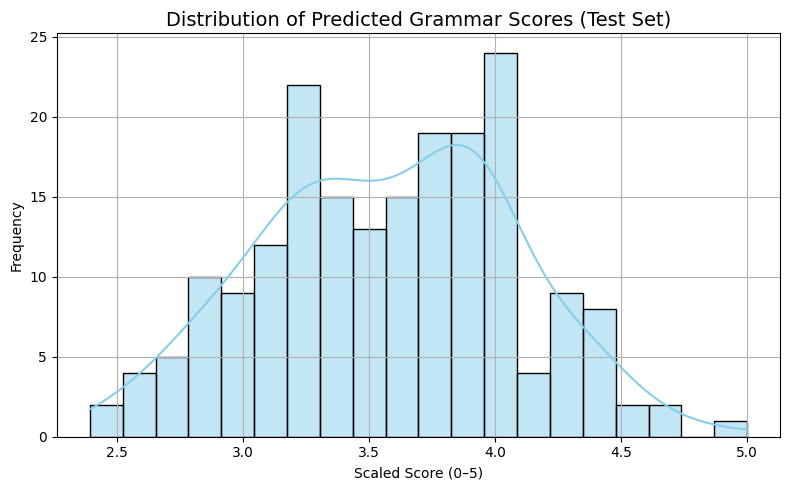

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(test_df['scaled_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Predicted Grammar Scores (Test Set)', fontsize=14)
plt.xlabel('Scaled Score (0–5)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Spliting training data for validation
X_train_texts, X_val_texts, y_train, y_val = train_test_split(
    train_texts, train_df['label'], test_size=0.2, random_state=42
)

# Training the model
model.fit(X_train_texts, y_train)

# Predicting on validation set
val_preds = model.predict(X_val_texts)


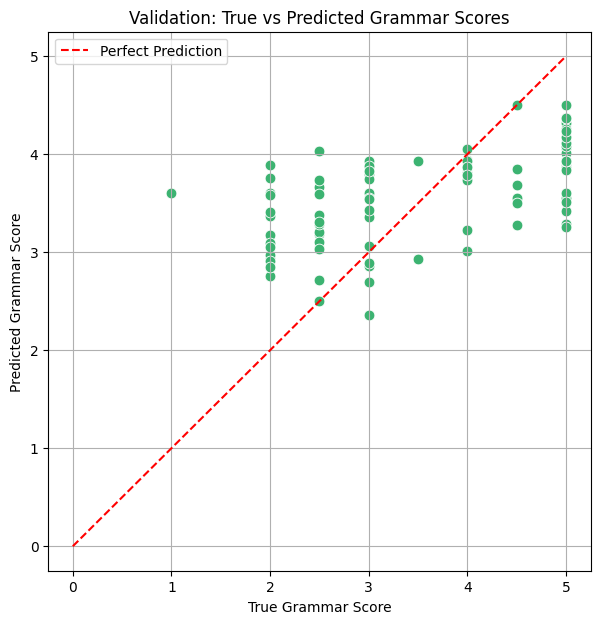

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_val, y=val_preds, color='mediumseagreen', s=60)
plt.plot([0, 5], [0, 5], 'r--', label='Perfect Prediction')
plt.xlabel('True Grammar Score')
plt.ylabel('Predicted Grammar Score')
plt.title('Validation: True vs Predicted Grammar Scores')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-35-7bf83b04f656>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='scaled_score', y='filename', data=top10, palette='viridis')
<ipython-input-35-7bf83b04f656>:10: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


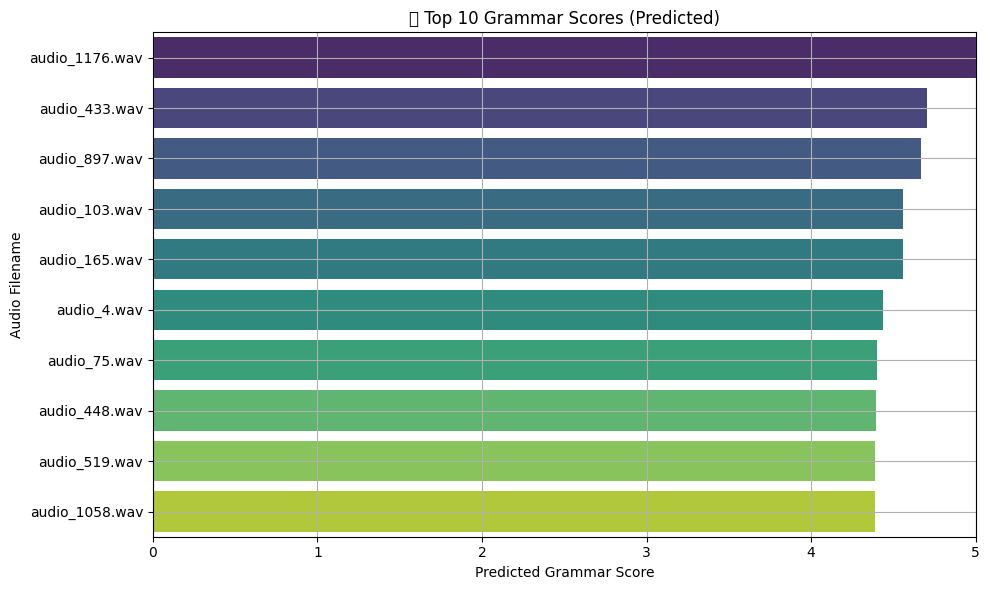

In [35]:
top10 = test_df.sort_values(by='scaled_score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='scaled_score', y='filename', data=top10, palette='viridis')
plt.title('🔝 Top 10 Grammar Scores (Predicted)')
plt.xlabel('Predicted Grammar Score')
plt.ylabel('Audio Filename')
plt.xlim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.show()


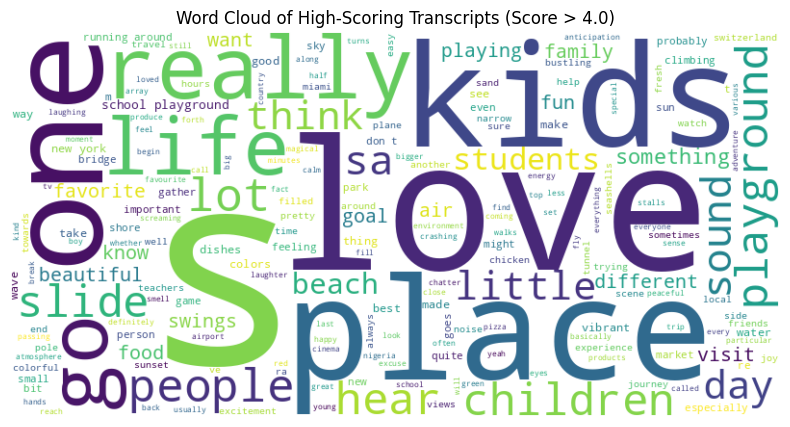

In [36]:
from wordcloud import WordCloud

# Filtering top-scoring transcripts
high_score_texts = [t for t, s in zip(test_texts, test_df['scaled_score']) if s > 4.0]
text_blob = ' '.join(high_score_texts)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of High-Scoring Transcripts (Score > 4.0)")
plt.show()


In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"Validation RMSE: {rmse_val:.4f}")


Validation RMSE: 0.9794


In [38]:
from scipy.stats import pearsonr

y_true = train_labels
y_pred = train_preds   #

correlation, p_value = pearsonr(y_true, y_pred)
print(f" Pearson Correlation (Training Set): {correlation:.4f}")


 Pearson Correlation (Training Set): 0.9374


In [39]:
from scipy.stats import pearsonr



correlation, p_value = pearsonr(y_true, y_pred)

print(f" Pearson Correlation: {correlation:.4f}")
print(f"  P-value: {p_value:.4e}")


 Pearson Correlation: 0.9374
  P-value: 1.1608e-204


<Figure size 600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


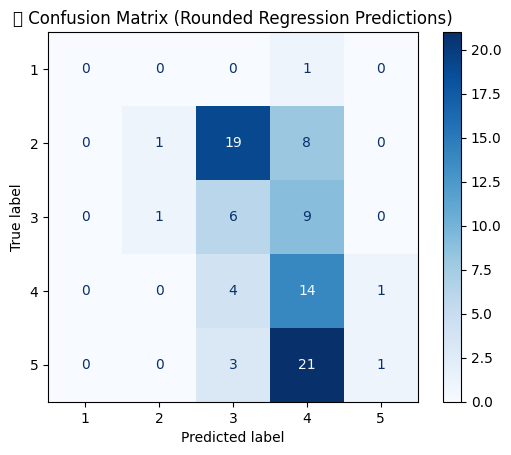

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Round predicted and actual values to nearest integer for simulation
y_val_rounded = np.clip(np.round(y_val), 1, 5).astype(int)
val_preds_rounded = np.clip(np.round(val_preds), 1, 5).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_val_rounded, val_preds_rounded, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])

# Plot it
plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("📊 Confusion Matrix (Rounded Regression Predictions)")
plt.show()


In [41]:
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()  # Select the kaggle.json file you downloaded earlier

# Move it to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [47]:
!mkdir -p ~/.kaggle


In [48]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [60]:
!kaggle competitions submit -c shl-intern-hiring-assessment -f submission.csv -m "Ridge TF-IDF final"


100% 6.22k/6.22k [00:00<00:00, 12.2kB/s]
Successfully submitted to SHL Hiring Assessment

In [61]:
!kaggle competitions submissions -c shl-intern-hiring-assessment

fileName               date                        description                                            status                     publicScore  privateScore  
---------------------  --------------------------  -----------------------------------------------------  -------------------------  -----------  ------------  
submission.csv         2025-04-06 21:12:25.563000  Ridge TF-IDF final                                     SubmissionStatus.COMPLETE  0.589                      
submission_scaled.csv  2025-04-06 21:11:06.277000  Ridge Regression with TF-IDF (n-gram: 1-3, alpha=0.7)  SubmissionStatus.ERROR                                
submission_scaled.csv  2025-04-06 21:09:03.223000  Fixed submission format                                SubmissionStatus.ERROR                                
submission_scaled.csv  2025-04-06 21:03:48.343000  Message                                                SubmissionStatus.ERROR                                
